# Lab Statement
This lab continues the examination of multivariate relationships in a data set. However, this time around the dataset is imported from the UCI Datasets Website instead of being randomly generated. This opens up the opportunity for a more "real-world application" since there are more attributes, a target vector, and a large dataset. Just like the previous lab, the analysis will be done by using Linear Regression Data Analysis and SciKitLearn.

# Objectives:
- Create and use Machine Learning Models with SciKitLearn
- Learn more advances NumPy (Numerical Python) Features
- Learn how to import data from remote webistes (UCI Datasets)
- Learn how to import and use SciKitLearn built-in datasets (Diabetes Dataset)
- Perform Multiple Regression Analysis with SciKitLearn
- Train - Test Split of the data with SciKitLearn
- Create Predictive Models
- Perform 3D Plotting with MatPlotLib
- Perform Model Evaluation
    - Model Score and Accuracy

# Introduction
Previously, we transitioned from a Simple Linear Regression Model with only *one* predictor to a Multiple Linear Regression Model with *two or more* predictors. This approach fitted a 2D surface (sheet) to a dataset that was generated in-house using the SciKitLearn dataset generator. Because of the potentially large amount of predictors, it's more efficient to use matrices to establish the regression model and analyses in Multiple Linear Regression Model settings. Essentially, the **Linear Regression** method of SciKitLearn was used to train the model with the data, taking into account a best fit. The result was that it gave a prediction from the data, and tested it using other data to see how well it fit into the model it created. We'll continue this analysis with data that is imported from online in this lab.

# Data and Problem Description
To create this dataset, 10 baseline variables were obtained from each diabetes patient in a sample size of **n = 442** patients. Also, the *response of interest* was recorded, which is a quantitative measure of the progression of diabetes in the patient after one year after the inital data was collected.

### ***Dataset Characteristics:***
- **Number of Instances (Sample Size):** 442
- **Number of Attributes:** 10 Columns; each column is a Numeric Predictive Value
- **Target of Interest:** Column 11 (Y) - The Response of Interest
- **Attributes:**
    - Age (Years)
    - Sex
    - Body Mass Index (BMI)
    - Average Blood Pressure
    - S1 (Blood Serum 1)
    - S2 (Blood Serum 2)
    - S3 (Blood Serum 3)
    - S4 (Blood Serum 4)
    - S5 (Blood Serum 5)
    - S6 (Blood Serum 6)
    
**Note:** Each of the Attributes have been ***mean centered and scaled*** by **multiplying the standard deviation by  n_samples**

**Source URL:** http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

# Loading the Diabetes Dataset from the Web
We can load the Diabetes Dataset directly into Pandas from the web; however, the values aren't normalized as mentioned above. This lack of normalization of values in the Feature Matrix can lead to errors when training models (which happens often).

In [1]:
#Import the Pandas Dataset into the Notebook
import pandas as pd

#Import the Diabetes Dataset from the Internet
df = pd.read_csv("http://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", encoding = 'utf-8', comment = '#', sep = '\s+')

#Show the final 5 rows of data
df.tail()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


 *Normalization* of the feature matrix is performed by adjusting the values of **ALL FEATURES** so that they have similar magnitudes. Scaling of the data is essential to make sure that Machine Learning algorithms are using the right data to make their predictions. Therefore, the correct scaling techniques can either **make or break an algorithm**. There are 2 popular methods to do this: **Standardization and Normalization**

### Standardization

Standardization is when the values from a dataset are centered around the mean with a unit standard deviation. Essentailly, the mean of a certain attribute becomes 0, and the distribution has a unit standard deviation as a result. This method is good to use when the data **DOES** follow a Gaussian distribution. Also, the data doesn't have to have a bounding range, so there can be outliers and they won't be affected.

**Source**: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

### Normalization (Min-Max)

Normlization is a technique that takes the values from a dataset and shifts and rescales them so they end up ranging between 0 and 1. This technique is good to use when you know that the distribution of the data **DOES NOT** follow a Gaussian distribution. Mainly useful in Machine Learning algorithms that don't assume distribution of data, such as K-Nearest Neighbors and Neural Networks.

**Source:** https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

# Building the Model in SciKitLearn

### Importing the Essentials

In [2]:
#Make Graphs Appear within Notebook
%matplotlib inline

#Importing NumPy
import numpy as np

#Loading the Diabetes Dataset
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()

The Diabetes Dataset is stored as a Python Dictionary, where the keys are the **Value Pairs ("Target" and "Data")**. The value of the **Target Key** is a *442 x 1 array*, and the value of the **Data Key** is a *442 x 10 array*. 

### Storing the Feature Matrix (X) and Reponse Vector (y)

In [3]:
X = diabetes.data
y = diabetes.target
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


**Features** are known as predictors, inputs, or attributes. The **Response** is known as the target, label, or output.

### Check the Shapes of the Feature Matrix and Response Vector

It's important to check the shape of the data after completing major tasks. In this case, there will be a **lower cap on the Response Vector** because it's a *Column Vector*. 

In [4]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


**X.shape** has more data because it *takes into account all the data from the 10 Attribute columns*, while **y.shape** only *focuses on the Target column*.

# Using Pandas to Its Fullest Potential

**Observations** are also known as samples, instances, or records

### Examine the First 5 Rows of the Feature Matrix and their Correlation

In [5]:
#Examine the First 5 Rows
pd.DataFrame(X, columns=['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']).tail()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [6]:
#Examine the Correlation
pd.DataFrame(X, columns=['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'])
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


# Preparing the Data

### Focusing on 2 Features
In order to **build the model**, the features **MUST BE NUMERIC**, and every observation must have the **SAME features in the SAME order**. Let's build a model that only focuses on 2 features from the data **BMI** and **BP**

In [7]:
#Focus ONLY on BPI and BP
features = (2, 3)
X = X[:, features]

# Splitting the Data

### The Main Split

In order for us to get the results wer're looking for, we need to **first train the Machine Learning Algorithm**. To do this, we need to **split X into** ***X_train, X_test, y_train, and y_test*** **using the SciKitLearn function** ***train_test_split()***

Thankfully, SciKitLearn has a function that randomly shuffles the data and splits it into **training** and **testing** data. This is called the **train_test_split()** function, and by default (unless you manually override the hyperparameters) will split the data with **75% of the rows being used for TRAINING** and **25% of the rows used for TESTING**

In [8]:
#Import the train_test_split
from sklearn.model_selection import train_test_split

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

### Checking the Shape
As mentioned above, checking the Shape periodically through the process is essential to make sure things are still running smoothly. This is especially important after completing a Split, to make sure that the correct amount of data is in the Training Set and Testing Set.

In [9]:
#Examine the Shape of the Training Set
print('X_train.shape: {}'.format(X_train.shape))
print('y_train.shape: {}'.format(y_train.shape))

X_train.shape: (331, 2)
y_train.shape: (331,)


In [10]:
#Examine the Shape of the Testing Set
print('X_test.shape: {}'.format(X_test.shape))
print('y_test.shape: {}'.format(y_test.shape))

X_test.shape: (111, 2)
y_test.shape: (111,)


**Reminder:** The column vector is only "2" because we're focusing ONLY on the BMI and BP!

### Create a Pandas Dataframe for Plotting
Now that the split was successfully completed, we can create the dataframe necessary for plotting the data.

In [11]:
diabetes_dataframe = pd.DataFrame(X_train, columns = ['BMI', 'BP'])

### Plotting the Preliminary Data
Let's check out what the results of the split were on a set Scatterplots and Histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119b0a970>,
      dtype=object)

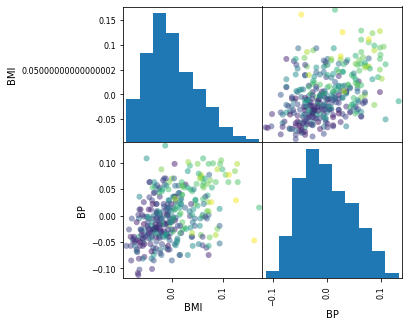

In [12]:
pd.plotting.scatter_matrix(diabetes_dataframe, c = y_train, figsize = (5, 5), marker = 'o', hist_kwds = {'bins':10})

From the Histograms, we can tell that the BMI Histogram has a **right skew**, which means that most of the data falls on the *Positive Side* of the peak. On the other side, the BP Histogram has a more normal-looking distribution, but there is still a **slight right skew**. These results are most likely because the **features were pre-processed** before the were imported into our dataframe. 

From the Scatterplots, there seems to be a **positive correlation** between BMI and BP. There are also a few outliers in these plots, which implies that there most likely was **Standardization Scaling** used to scale the data, since that technique keeps outliers intact.

# Creating a Predictive Model

### Instantiate the Model
To do this, we need to use the default parameters by creating instances of the model. Normally, this is seen through Ordinary Least Squares Regression, but we're using Linear Regression for this lab.

In [13]:
#Instantiate the Model
regr = linear_model.LinearRegression()

### Train the Model
Use the data from the Training Data in the train_test_split() to train this model.

In [14]:
#Training the Model
regr.fit(X_train, y_train)

LinearRegression()

### Print the Coefficients
Now for the moment of truth!

In [15]:
#Print the Coefficients
print(regr.coef_)

[855.51017633 383.24090075]


# Model Evaluation: Making Predictions and Scoring the Model

### Making Predictions
Now that our model is trained and ready to go, we can now use it to make predictions on **new data** that the model hasn't seen before and that we don't know the outcomes for. In order for us to **make a prediction**, the new observation must have the **SAME FEATURES AS THE TRAINING OBSERVATIONS** both in **numbers** and **meaning**

To **predict a new y-value base on the data from the Training Set**, we need to input a *normalized list of BMI and BP data*. It doesn't matter what data pair we use, as long as it's normalized. This is another reason why scaling the data during the pre-processing stage is so important!

In [16]:
#Predicting a new Y-value based on Training Set data...we're going to use data from Patient 437 (n = 437)
X_new = np.array([0.019662, 0.059744])

#Reshaping the Array so NumPy can use it
X_new = np.reshape(X_new, (1, -1))

#Check the Results by looking at the Shape of the Array
print('X_new Shape: {}'.format(X_new.shape))

X_new Shape: (1, 2)


To make an accurate prediction, we need to call the **predict** method of the **regr** object.

In [17]:
#Make the Prediction
prediction = regr.predict(X_new)[0]

#Checking the Results of the Predicted Value vs. Actual Value
print("The prediction from the Model is: {0:0.2f}".format(prediction))
print('The true value from the dataset is: {0:0.2f}'.format(y[437]))

The prediction from the Model is: 193.10
The true value from the dataset is: 178.00


**Note:** We use "(y[**437**])" because we're checking the data from Patient 437; this will change when the Patient Number changes.

### Checking the Accuracy

In [18]:
print("The model's test set accuracy is {0:0.2f}%".format(100*regr.score(X_test, y_test)))

The model's test set accuracy is 24.62%


# The Multivariate Model Equation

In order to build a Multivariate Model, we need to get the regression coefficients and the intercept. The coefficients we know from above, but we need to figure out the intercept.

### Getting the Coefficients and Intercept Data

In [19]:
#Getting the Coefficients and Intercept
coef0 = regr.coef_[0]
coef1 = regr.coef_[1]
intercept = regr.intercept_

#Printing the Information
print('The Coefficient of the feature BMI is {}'.format(coef0))
print('The Coefficient of the feature BP is {}'.format(coef1))
print('The Intercept has the value of {}'.format(intercept))

The Coefficient of the feature BMI is 855.5101763296332
The Coefficient of the feature BP is 383.2409007495853
The Intercept has the value of 153.3821238179241


### Building the Model

From the information above, we know what our Multivariate Model is:
### y = 855.51*BMI + 383.24*BP + 153.38
where **y** is the quantitative measure of the disease (diabetes) progression one year after the baseline analysis.

### Using the Model Equation with our Data to Predict the Disease's Progression
In order to predict the progression, we'll use the same values from Patient 437...

In [20]:
#Predicting the Progression
BMI, BP = 0.019662, 0.059744
y = 855.51*BMI + 383.24*BP + 153.38

#Printing the Prediction
print('Prediction from the model equation is: {0:0.2f}'.format(y))

Prediction from the model equation is: 193.10


# Creating 3D Plots with MatPlotLib

In order for us to get a clear understanding as to how our model did, as well as tell others about it, we will create a 3D graph to convey the results.

### Getting the Essentials

In [21]:
#Import PyPlot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Define an Inline Function (using Lambda) with coefficient variables returned from the Regression Analysis
coef = regr.coef_
intercept = regr.intercept_
line = lambda x1, x2: coef[0]*x1 + coef[1]*x2 + intercept

### Plotting the Data

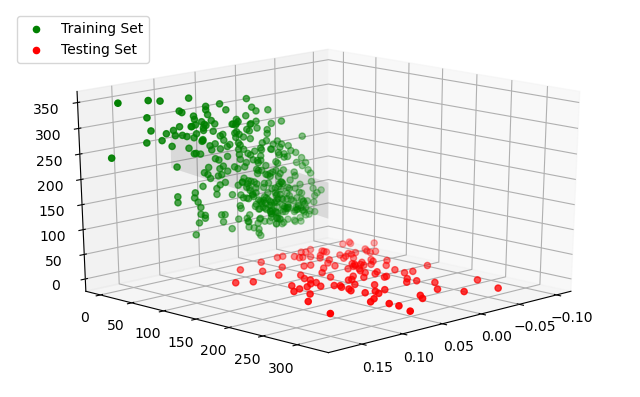

In [22]:
#Establishing the Figure Size
fig = plt.figure(figsize = (8,5), dpi = 100)
grid_x1, grid_x2 = np.mgrid[-.1:.1:10j, -.1:.1:10j]

#Incorporating the Axes
ax = Axes3D(fig)
ax = plt.axes(projection='3d')

#Establishing Information on the Graph
ax.scatter(X_train[:,0], X_train[:,1], y_train, color = 'green', label = 'Training Set')
ax.scatter(X_test[:,1], y_test, facecolor = 'red', label = "Testing Set")
ax.plot_surface(grid_x1, grid_x2, line(grid_x1, grid_x2), alpha = 0.1, color = 'black')

#Changing the Viewing Angle
ax.view_init(20, 45)

#Legend
plt.legend (loc = 'upper left')

# Experimenting with Different Feature Combinations

Because of the model for the combination of BMI and BP yielded a very low accuracy rate, it's important to try out different combinations of features. A different feature combination might produce a model with a higher accuracy. For these test, I choose to experiment with the combinations of **BMI and Serum 5 (S5)**, **BP and Serum 6 (S6)**, and **BMI, Serum 4 (S4), and Serum 5 (S5)** because they yield relatively high correlation scores.

### BMI and S5 (Serum 5)
There were a few similarities and differences when doing a comparison between **BMI and S5 (Serum 5)**. The histogram of S5 follows a normal distribution pattern, but it's not as normal-shaped as BP. The scatterplot pattern of BMI and BP was similar to that of BMI and BP because they both had positive correlations. However, there are stark differences in the models themselves. As stated above, the **model for BMI and BP was "y = 855.51*BMI* + 383.24*BP* + 153.38"** while the **model for BMI and S5 was "y = 735.37*BMI + 615.36*BP + 152.93"**. Likewise, the accuracies were also very different. The **accuracy for BMI and BP was 24.62%** while the **accuracy for BMI and S5 was 27.59%**, so significantly higher. This translated to a larger "sheet" of best fit that included more data points, due to the increase accuracy of the model. Which, ultimately, was because of the increased correlation between the two 
attributes.

### BP and S6 (Serum 6)
Much like BMI and S5, there were similarities and differences when doing a comparison between **BP and S6**. The histogram for S6 more normally distributed than the others; however, Bin 6 had a **very high value** when compared to the other bins around it. This might be attributed to **potential outliers** in the data. The scatterplot of BP and S6 also had a positive correlation associated with it. Just like above, there were significant differences between the models themselves. As stated before, the **model for BMI and BP was "y = 855.51*BMI + 383.24*BP + 153.38"** while the **model for BP and S6 was "y = 602.22*BP* + 372.0456*S6* + 152.45**. The accuracies of the two models were also very different. The **accuracy for BMI and BP was 24.62%** while the **accuracy for BP and S6 was 21.48%**, so significantly lower. This translated to a much smaller "sheet" of best fit that included less data points than the original model, due to the decreased of this model. This is attributed to the slightly lower correlation between the two attributes.

### BMI, S4 (Serum 4), and S5 (Serum 5)
The previous comparisons were with only two attributes being compared. This time around, I wanted to experiment to see what would happen if I were to include a third attribute...and the results were interesting. I chose BMI, S4, and S5 because the correlation values were some of the highest on the comparison table, so I thought that it would produce a high accuracy model. What I ended up getting was significantly higher than the original model, but not by much. The model ended up being **y = 727.18*BMI* + 48.69*S4* + 589.24*S5* + 152.88** with an **accuracy of 27.80%**. When compared to the original model, it performs better. However, when compared to the accuracy of the BMI/S5 (27.59%) **it's not that much better**. My guess as to why this is the case is because of the **inclusion of the S4 attribute**, which had a weaker accuracy score. While it didn't hinder the over accuracy too much, the inclusion of a different attribute might increase the accuracy of the model.

# Final Thoughts

- The model's accuracy with this dataset is **very low, only 24.62%.** One might think that this might be because the data wasn't cleaned or scaled properly; however, I think it was flawed from the beginning because the **correlation values were low.** But, this is real-world data...and as said in the last lab: **real-world data sometimes doesn't play nice**.
- The Multi-Variate Linear Regression can work with datasets with much higher dimensions, so working with a large number of inputs in a model is easy. However, the **more attributes makes it MUCH harder to visualize!**
- A model with much higher attributes associated with it doesn't necessarily mean that it will produce a better model, as seen with the comparisons between the **BP and S6** and **BMI, S4, and S5** models. **What really matters is the correlation between the attributes in the model.** The greater the correlation, the better chance that the model will have a higher accuracy.
- A good "Sheet of Best Fit" will cover both the Training Set and Testing Set seen in a 3D graph, **the Sheet of Best Fit is directly correlated to the accuracy of the model, which is related to the correlation of the attributes at the start.**